#Restricted Boltzmann Machines
Restricted Boltzmann Machine (RBM) is an extended version of the Boltzmann Machine which is one type of Energy-Based models.



$E(X,H)=-X^{T}B-C^{T}H-X^{T}WH$

where X is the vector of the input $(X_{1},.. X_{i})^{T}$
H is the hidden or output layer $h=(H_{1},....,h_{j})^{T}$.
B is the bias for visible node
C is the bias for hidden node
W is the weight matrix.



The nodes have undirected edges from all input to all hidden nodes but neither between input or between hidden nodes.
The variables are assumed to be binary 0 or 1

The probability distribution of the whole model is assumed to be of the form
$P(X,H)=\frac{exp(-E(X,H))}{Z}$

Z is constant that has the value to normalize the probabilty.
 $Z=\sum_{X,H}exp(-E(X,H))$

 Z is called the partition function.

 The probability distribution is given as 
 $P(X,H)=\frac{exp(-E(X,H))}{Z}$

 $=\frac{exp(X^{T}b+c^{T}H+X^{T}WH)}{Z} $


 $=\frac{exp(X^{T}b+\sum_{j}(c_{j}+X^{T}w_{j})H_{j})}{z}$

 $=\frac{exp(X^{T}b)+\prod_{j}exp(c_{j}+X^{T}w_{j})H_{j})}{z}$


The Marginal P(x) over the hidden variables:
The hidden nodes have been introduced to increase the representational power of the model . Hence we compute 
$P(X)=\sum_{h}P(X,H)$

$=\sum_{h}\frac{exp(X^{T}b)+\prod_{j}exp(c_{j}+X^{T}w_{j})H_{j})}{z}$

$=\frac{exp(X^{T}b)\sum_{h1}...\sum_{hj}\prod_{j}exp((c_{j}+X^{T}w_{j})H_{j})}{z}$

$=\frac{exp(X^{T}b)\prod_{j}\sum_{hj}exp((c_{j}+X^{T}w_{j})H_{j})}{z}$

$=\frac{exp(X^{T}b)\prod_{j}(1+exp(c_{j}+X^{T}w_{j}))}{z}$ 

$where H_{j}\in{0,1}$ 

Conditional P(H|X) is given as 
   P(H|X)=$\frac{P(X,H)}{P(X)}$
where after substituting the values we get 

$P(h=1|X)=\frac{exp(c_{j}+X^{T}w_{j})}{1+exp(c_{j}+X^{T}w_{j})}$

the above equation is similar to the sigmoid function hence

$=\sigma(c_{j}+X^{T}w_{j})$

$=y_{i}(X)$

Due to the symmetry of the energy  w.r.t. X and H P(x=1|H) can also be derived similarly.
hence $P(X=1|H)=\sigma(b_{j}+H^{T}w_{j})$


Update of the parameter is done using contrastive divergence.

where gradient is calculated using the emperical avergae over data +emperical average over model distribution
$\triangle \theta= \frac{\sum{\partial{f(x)}}}{\partial{\theta}}+  \frac{\sum{\partial{f(x)}}}{\partial{\theta}}$

gradient of biases
$\triangle b= <\hat {x_{i}}>-<x_{i}>$

$\triangle c= <y_{i}(\hat {x_{i}})>-<y_{i}(x_{i})>$

$\triangle w= <X_{i}y_{i}(\hat {x_{i}})>-<X_{i}y_{i}(x_{i})>$

where the first term is the average of  data distribution 
and second term is the average of the model distribution.

w=w+alpha*$\triangle w$

b=b+alpha*$\triangle b$

c=c+alpha*$\triangle c$










In [0]:
!pip install tensorflow==1.14

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from mlxtend.data import loadlocal_mnist
from tensorflow.examples.tutorials.mnist import input_data

In [149]:
MNIST = input_data.read_data_sets('../MNIST_data', one_hot=True)
X_dimension = MNIST.train.images.shape[1]
y_dimension = MNIST.train.labels.shape[1]

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
# define the weight and bias
def Weight(Visible,Hidden):
     return np.random.randn(Visible,Hidden)
def Bias(value):
   return np.random.randn(value)     

def sigmoid(x) :
    return 1/(1 + np.exp(-x)) 

In [0]:
class RBM():

  def __init__(self, visible ,hidden=500):
      self.visible=visible
      self.hidden=hidden
      self.weight=Weight(self.visible,self.hidden)
      self.hidden_bias=Bias(self.hidden)
      self.visible_bias=Bias(self.visible)
      self.branch_size=16

  def prob_hgv(self,visible):
     return sigmoid(np.matmul(visible,self.weight)+self.hidden_bias)

  def prob_vgh(self,hidden):
    return sigmoid(np.matmul(hidden,self.weight.T)+self.visible_bias)

  def sampling_hgv(self,v_sample):
    return np.random.binomial(n=1,p=self.prob_hgv(v_sample))

  def sampling_vgh(self,h_sample):
    return np.random.binomial(n=1,p=self.prob_vgh(h_sample))

  
  def contrastive_divergence(self,value):

    self.k=5
    h_inital=self.prob_hgv(value)
    v_sample=np.copy(value)
    
    for i in range(self.k):
        h_sample=self.sampling_hgv(v_sample)
        v_sample=self.sampling_vgh(h_sample)
        
      
    h_sample=self.prob_hgv(v_sample)
    pw_g= np.outer(value,h_inital)
    nw_g =np.outer(v_sample,h_sample)
    w_g=pw_g-nw_g

    hidden_g= h_inital-h_sample
    visible_g= value-v_sample


   
   
    return w_g,hidden_g,visible_g

  
  def train(self):
    for  epoch in range(1,1000):
      train_set=(MNIST.train.next_batch(self.branch_size)[0] > 0.5).astype(np.float)
      weight_gradient=0
      hidden_gradient=0
      visible_gradient=0
      for v in train_set:
        w_g,hidden_g,visible_g=self.contrastive_divergence(v)


        weight_gradient=weight_gradient+w_g
        hidden_gradient=hidden_gradient+hidden_g
        visible_gradient=visible_gradient+visible_g
      
      weight_gradient=(weight_gradient)/ self.branch_size
      hidden_gradient=(hidden_gradient)/self.branch_size
      visible_gradient=(visible_gradient)/self.branch_size

      self.weight=self.weight+0.1*weight_gradient
      self.hidden_bias=self.hidden_bias+0.1*hidden_gradient
      self.visible_bias=self.visible_bias+0.1*visible_gradient 
   


  def plot(self,samples,size,name):
    size = int(size)
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4,4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(size, size), cmap='Greys_r')
        plt.show()
    #plt.savefig('out/{}.png'.format(name), bbox_inches='tight')
    plt.close(fig)


  def reconstruct_model(self):
     X = (MNIST.test.next_batch(self.branch_size)[0] > 0.5).astype(np.float)
     H=self.sampling_hgv(X)
     x_contruct=(self.sampling_vgh(H)>0.5).astype(np.float)
     self.plot(x_contruct,np.sqrt(self.visible),'V')

## remove pixels  that have values greater than a certain thereshold 
  def reconstruct_model_pixel_remove(self,value):
     X = MNIST.test.next_batch(self.branch_size)[0]
     missing=np.random.uniform(0,1,len(X))>((100-value)/100)
     X_remove=X[missing==False]
     H=self.sampling_hgv(X_remove)
     x_contruct=(self.sampling_vgh(H)>0.5).astype(np.float)
     self.plot(x_contruct,np.sqrt(self.visible),'V')

  
 

In [0]:
def main(hidden):
    rbm=RBM(X_dimension,hidden)
    rbm.train()
    rbm.reconstruct_model()
    

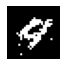

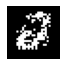

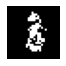

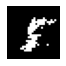

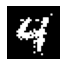

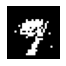

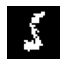

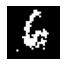

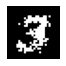

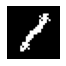

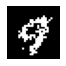

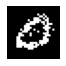

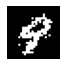

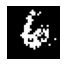

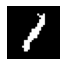

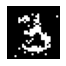

In [153]:
main(500)

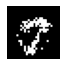

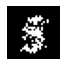

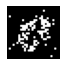

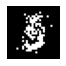

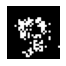

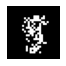

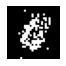

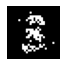

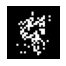

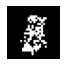

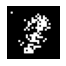

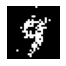

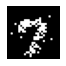

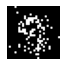

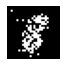

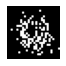

In [154]:
main(20)

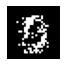

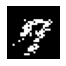

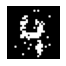

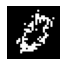

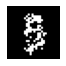

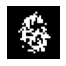

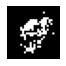

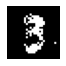

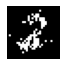

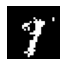

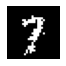

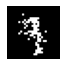

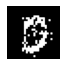

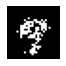

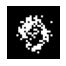

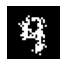

In [155]:
main(100)

In [0]:
# removing 20  50 80 
def main(hidden):
    rbm=RBM(X_dimension,hidden)
    rbm.train()
   
    print ("removed 20%")
    rbm.reconstruct_model_pixel_remove(20)
    
    print("removed 50%")
    rbm.reconstruct_model_pixel_remove(50)

    print("removed 80%")
    rbm.reconstruct_model_pixel_remove(80)

removed 20%


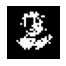

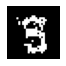

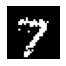

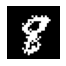

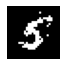

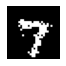

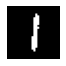

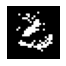

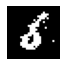

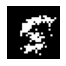

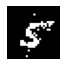

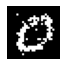

removed 50%


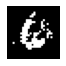

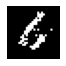

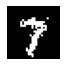

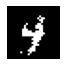

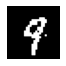

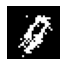

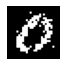

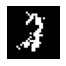

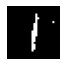

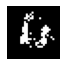

removed 80%


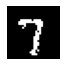

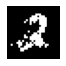

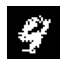

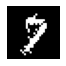

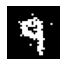

In [157]:
main(500)

removed 20%


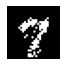

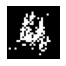

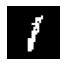

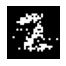

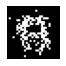

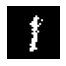

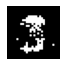

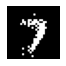

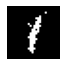

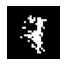

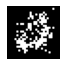

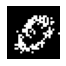

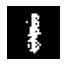

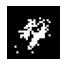

removed 50%


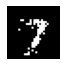

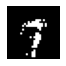

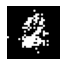

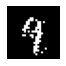

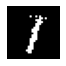

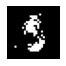

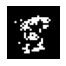

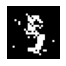

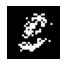

removed 80%


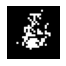

In [147]:
main(100)

removed 20%


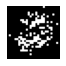

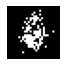

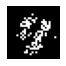

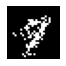

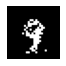

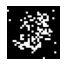

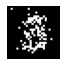

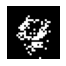

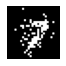

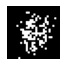

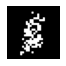

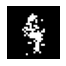

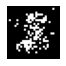

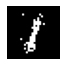

removed 50%


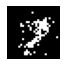

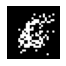

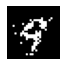

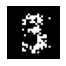

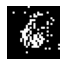

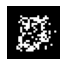

removed 80%


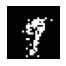

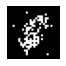

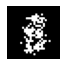

In [158]:
main(20)

reference:
https://www.youtube.com/watch?v=bMaITeXhOaE&feature=youtu.be
https://rubikscode.net/2018/10/01/introduction-to-restricted-boltzmann-machines/

http://lyy1994.github.io/machine-learning/2017/04/17/RBM-tensorflow-implementation.html